# SVM Classifier Examples
### Chistopher Evans 
### November 7, 2019

We are continuing work from the notebook titled 'Data Processing and EDA'. We are now going to see the reactions of various machine learning algorithms using scikit. There will be annotations that will add more clarity to the results.

To retain simplicity, the purpose of the models is to see if ASD Traits can be detected through the 10 questions themsleves. Performance will be evaluated and compared.

## Gathering the Data

In [4]:
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
import warnings
warnings.filterwarnings('ignore')

InteractiveShell.ast_node_interactivity = "all"

# Importing the actual datasets
screening = pd.read_csv("Toddler Autism dataset July 2018.csv")

# Extracting the names of the columns for future use
colnames = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
results = ['Class/ASD Traits ']

#Gathering all of the data
screening_extracted = screening[colnames]
screening_answers = screening[results]

# Simplifying the data into 1s and 0s for easier use
screening_numerical = screening_answers.eq("Yes").mul(1)

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Setting up the variables
X = screening_extracted.as_matrix()
y = screening_numerical.as_matrix()

# Setting up the sets
train_set, test_set = train_test_split(X, test_size=0.2, random_state = 42)
train_set2, test_set2 = train_test_split(y, test_size=0.2, random_state = 42)


## Scaling The Data
Scaling the data is very important, because Support Vector Machines are sensitive to feature scales. The scaling can influence the relative distance between the points and their margins instantaneously.

There is no need to scale the data here. This is because every point matters and must be weighted as they currently are.

In [4]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(train_set)
#yelp_scaled = scaler.transform(train_set)

## Linear SVM Classification

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
svm_reg = LinearSVC()
svm_reg.fit(train_set,train_set2)
results = svm_reg.predict(test_set)
for a in range (0, 100):
    print(str(results[a]) + "   " + str(test_set2[a]))
    print(test_set[a])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

1   [1]
[1 1 1 0 0 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 1 1 0 1]
0   [0]
[0 0 0 0 0 0 1 0 0 1]
1   [1]
[1 0 1 1 1 0 1 0 0 1]
1   [1]
[1 0 0 0 1 0 1 0 1 0]
0   [0]
[1 0 0 0 0 1 0 0 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 1 0 0 0 0 0 0]
1   [1]
[1 1 1 1 1 1 0 1 1 1]
0   [0]
[0 0 0 0 0 1 1 0 0 0]
1   [1]
[1 0 1 1 1 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
1   [1]
[1 1 0 1 1 1 1 1 1 0]
1   [1]
[1 1 1 1 1 1 1 1 1 1]
1   [1]
[0 0 1 1 0 0 1 0 1 0]
1   [1]
[1 1 1 0 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 0 1 1 1 1]
1   [1]
[1 1 1 1 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 0 1 1 0 1 1 1]
1   [1]
[1 1 0 1 0 1 1 0 1 1]
0   [0]
[1 0 0 0 1 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[0 1 1 1 0 1 0 1 0 1]
1   [1]
[1 1 0 1 0 1 1 0 0 1]
1   [1]
[1 0 1 1 1 1 0 1 1 0]
1   [1]
[1 0 1 1 1 1 1 0 0 0]
1   [1]
[0 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[1

Confustion Matrix:
[ 69   0   0 142]
Precision:
1.0
Recall:
1.0
F1 Score:
1.0
Area Under the ROC:
1.0


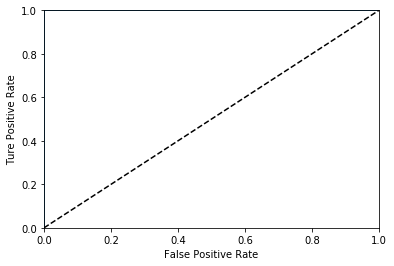

In [7]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()

## Stochastic Gradient Descent

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_reg = SGDClassifier(loss="hinge", penalty="l2")
sgd_reg.fit(train_set, train_set2)
results = sgd_reg.predict(test_set)
for a in range (0, 100):
    print(str(results[a]) + "   " + str(test_set2[a]))
    print(test_set[a])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

1   [1]
[1 1 1 0 0 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 1 1 0 1]
0   [0]
[0 0 0 0 0 0 1 0 0 1]
1   [1]
[1 0 1 1 1 0 1 0 0 1]
1   [1]
[1 0 0 0 1 0 1 0 1 0]
0   [0]
[1 0 0 0 0 1 0 0 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 1 0 0 0 0 0 0]
1   [1]
[1 1 1 1 1 1 0 1 1 1]
0   [0]
[0 0 0 0 0 1 1 0 0 0]
1   [1]
[1 0 1 1 1 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
1   [1]
[1 1 0 1 1 1 1 1 1 0]
1   [1]
[1 1 1 1 1 1 1 1 1 1]
1   [1]
[0 0 1 1 0 0 1 0 1 0]
1   [1]
[1 1 1 0 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 0 1 1 1 1]
1   [1]
[1 1 1 1 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 0 1 1 0 1 1 1]
1   [1]
[1 1 0 1 0 1 1 0 1 1]
0   [0]
[1 0 0 0 1 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[0 1 1 1 0 1 0 1 0 1]
1   [1]
[1 1 0 1 0 1 1 0 0 1]
1   [1]
[1 0 1 1 1 1 0 1 1 0]
1   [1]
[1 0 1 1 1 1 1 0 0 0]
1   [1]
[0 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[1

Confustion Matrix:
[ 69   0   0 142]
Precision:
1.0
Recall:
1.0
F1 Score:
1.0
Area Under the ROC:
1.0


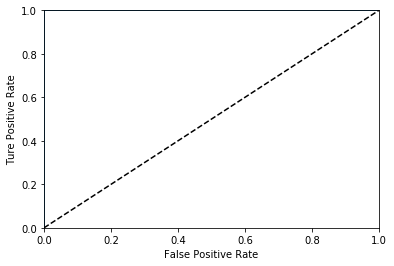

In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()

## NuSVC

In [10]:
from sklearn.svm import NuSVC
nu_reg = NuSVC()
nu_reg.fit(train_set,train_set2)
results = svm_reg.predict(test_set)
for a in range (0, 100):
    print(str(results[a]) + "   " + str(test_set2[a]))
    print(test_set[a])

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

1   [1]
[1 1 1 0 0 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 1 1 0 1]
0   [0]
[0 0 0 0 0 0 1 0 0 1]
1   [1]
[1 0 1 1 1 0 1 0 0 1]
1   [1]
[1 0 0 0 1 0 1 0 1 0]
0   [0]
[1 0 0 0 0 1 0 0 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 1 0 0 0 0 0 0]
1   [1]
[1 1 1 1 1 1 0 1 1 1]
0   [0]
[0 0 0 0 0 1 1 0 0 0]
1   [1]
[1 0 1 1 1 1 1 0 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
0   [0]
[0 0 0 0 0 0 0 0 0 0]
1   [1]
[1 1 0 1 1 1 1 1 1 0]
1   [1]
[1 1 1 1 1 1 1 1 1 1]
1   [1]
[0 0 1 1 0 0 1 0 1 0]
1   [1]
[1 1 1 0 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 0 1 1 1 1]
1   [1]
[1 1 1 1 1 1 1 1 0 0]
1   [1]
[1 0 1 1 1 1 1 1 1 1]
0   [0]
[0 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 0 1 1 0 1 1 1]
1   [1]
[1 1 0 1 0 1 1 0 1 1]
0   [0]
[1 0 0 0 1 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[0 1 1 1 0 1 0 1 0 1]
1   [1]
[1 1 0 1 0 1 1 0 0 1]
1   [1]
[1 0 1 1 1 1 0 1 1 0]
1   [1]
[1 0 1 1 1 1 1 0 0 0]
1   [1]
[0 0 1 1 1 1 1 1 1 1]
0   [0]
[1 0 0 0 0 0 0 0 0 1]
1   [1]
[1 1 0 1 1 1 1 1 1 1]
1   [1]
[1

Confustion Matrix:
[ 69   0   0 142]
Precision:
1.0
Recall:
1.0
F1 Score:
1.0
Area Under the ROC:
1.0


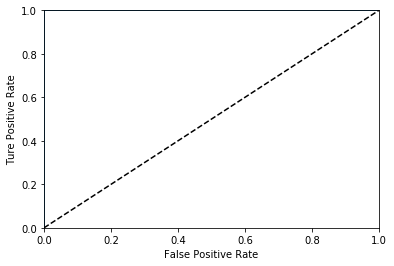

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()

## RBF Kernel

In [12]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([("scaler",StandardScaler()), ("svm_clf", SVC(kernel="rbf", gamma =5, C=0.00001))])
rbf_kernel_svm_clf.fit(train_set,train_set2)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1e-05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Confustion Matrix:
[ 69   0   0 142]
Precision:
1.0
Recall:
1.0
F1 Score:
1.0
Area Under the ROC:
1.0


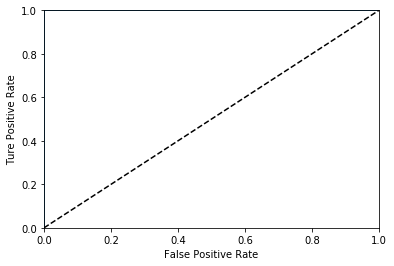

In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()